In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_rows', 15)

In [3]:
df = pd.read_csv("./indicadores.csv")
df

,Periodo,Valor
0,2022/07,111.274552
1,2022/06,112.797501
2,2022/05,114.442424
3,2022/04,109.529866
4,2022/03,111.940152
...,...,...
350,1993/05,63.612900
351,1993/04,61.865984
352,1993/03,63.943249
353,1993/02,61.022521


Reverse the dataframe to have the data in ascending order.

In [4]:
df = df.iloc[::-1]

We plot the last 12 values to see the behavior of the values.

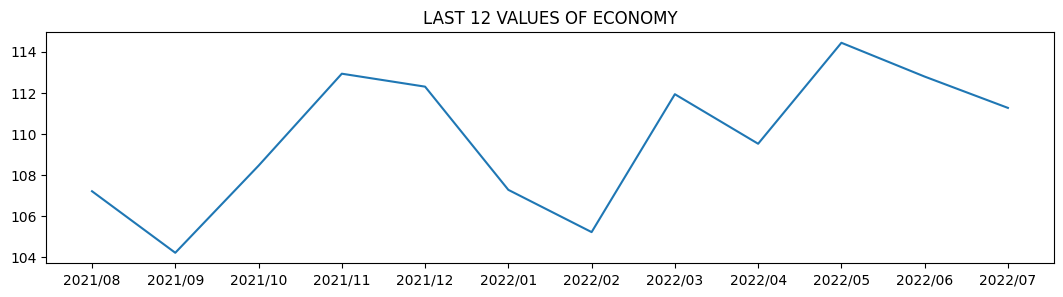

In [5]:
periodo = df['Periodo']
valor = df['Valor']
x = np.arange(355)                                                                             
y = np.array(valor)    
plt.subplots(figsize=(13,3))   
plt.xticks(x, periodo)        
plt.title('LAST 12 VALUES OF ECONOMY')                                                                      
plt.plot( x[-12:],y[-12:])

Auto-Correlation Function (ACF) plot

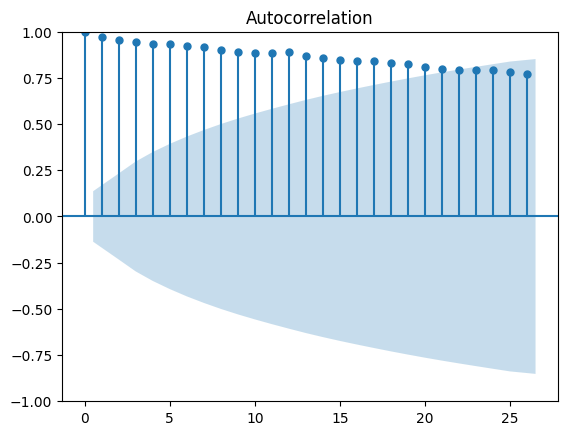

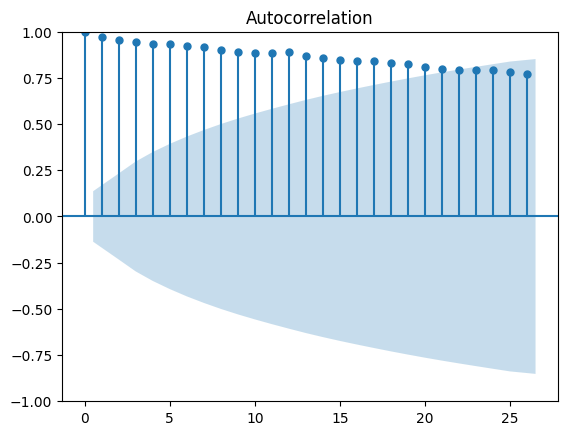

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Valor'], alpha=0.01)

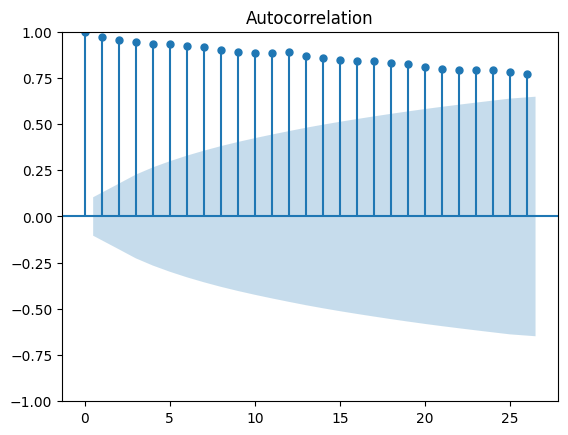

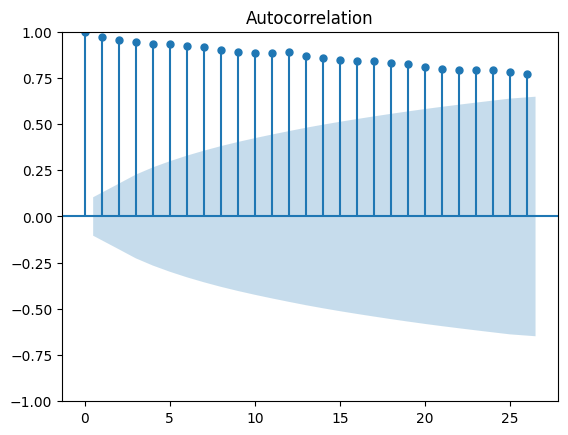

In [7]:
plot_acf(df['Valor'], alpha=0.05)

ACF values

In [8]:
from statsmodels.tsa.stattools import acf
print(acf(df['Valor']))

[1.         0.97385309 0.95657713 0.94287947 0.93473758 0.93341655
 0.92270419 0.91714631 0.9018109  0.89045036 0.88406187 0.88242834
 0.88734337 0.86805911 0.85643215 0.84442745 0.83967988 0.83968947
 0.82859865 0.82388532 0.81011912 0.79865123 0.79338774 0.79239783
 0.79525813 0.7798449 ]


Partial Auto-Correlation Function (PACF) plot

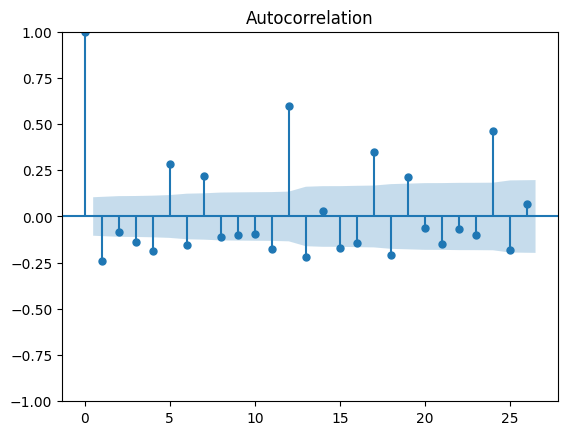

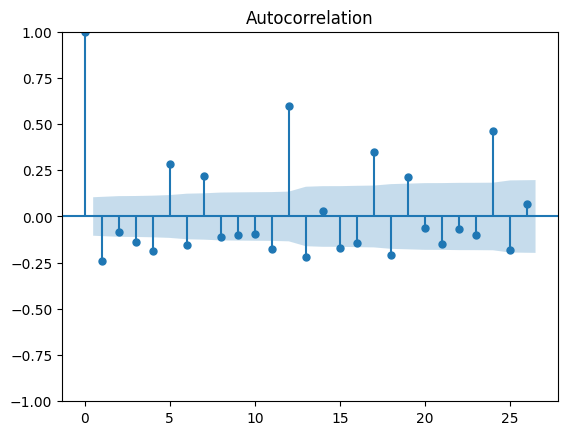

In [9]:
frame = df.set_index('Periodo')
data_df = frame.diff()
data_df = data_df.dropna()

plot_acf(data_df)

Seasonal differencing

C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


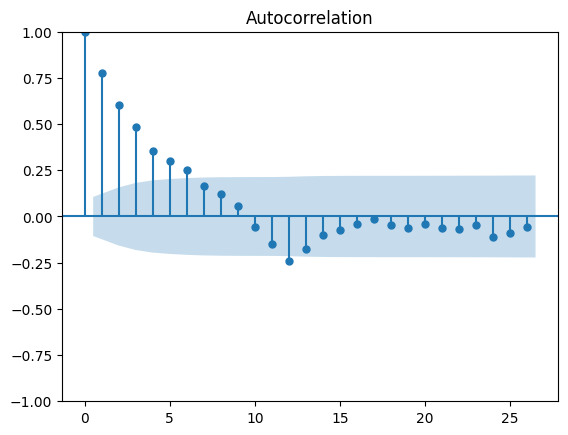

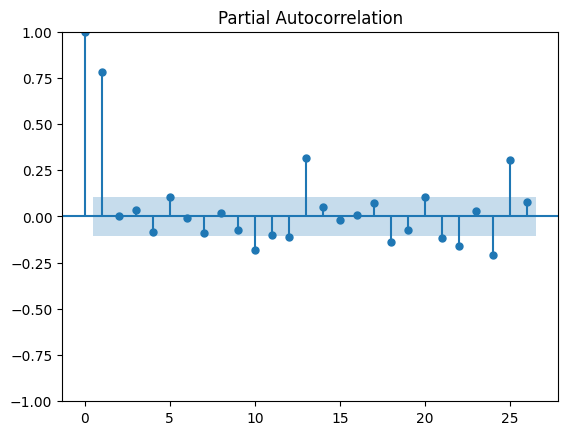

In [10]:
frame = df.set_index('Periodo')
data_df = frame.diff(12)
data_df = data_df.dropna()

plot_acf(data_df)

plot_pacf(data_df)
plt.show()

Augmented Dickey-Fuller test

In [11]:
from statsmodels.tsa.stattools import adfuller
#perform augmented Dickey-Fuller test
adfuller(df['Valor'])

(-0.909471579673849,
 0.7848372897902504,
 17,
 337,
 {'1%': -3.4499043309021955,
  '5%': -2.870154885338925,
  '10%': -2.5713597190254385},
 1520.2960991273508)

ARIMA MODEL

In [12]:
# Import arima model
from statsmodels.tsa.arima.model import ARIMA
#statsmodels.tsa.arima.model.ARIMA
# fit model
frame = df.set_index('Periodo')
model = ARIMA(frame, order=(2,1,2))
res = model.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Valor   No. Observations:                  355
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -869.050
Date:                Mon, 24 Oct 2022   AIC                           1748.101
Time:                        17:06:04   BIC                           1767.447
Sample:                    01-01-1993   HQIC                          1755.798
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4130      0.154     -2.679      0.007      -0.715      -0.111
ar.L2          0.2509      0.121      2.070      0.038       0.013       0.488
ma.L1          0.0593      0.148      0.401      0.6

C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


confidence intervals and standard error ARIMA model

In [13]:
forecasts, SE, interval = res.forecast(steps=12, alpha=0.05)

ValueError: too many values to unpack (expected 3)

SARIMA MODEL

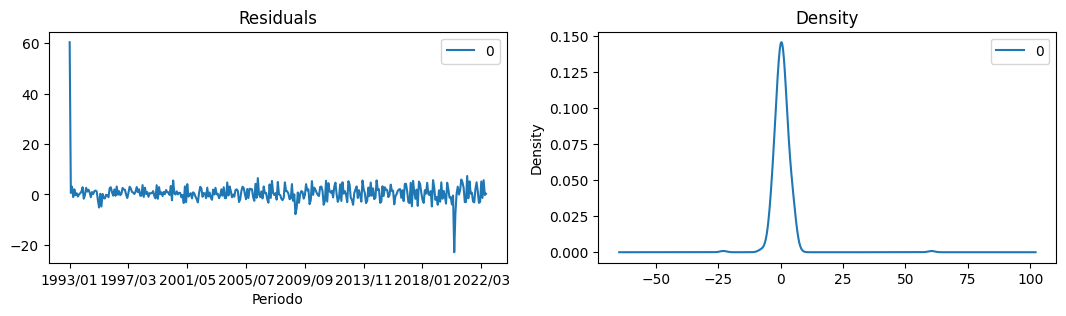

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(res.resid)
fig, ax = plt.subplots(1,2, figsize=(13, 3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
import statsmodels.api as sm
frame = df.set_index('Periodo')

mod = sm.tsa.statespace.SARIMAX(frame,
                                order=(2,0,1),
                                seasonal_order=(1,1,1,12),
                                trend="c",
                                simple_differencing=True)
results = mod.fit()
print(results.summary())

C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                         DS12.Valor   No. Observations:                  343
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -742.491
Date:                            Fri, 21 Oct 2022   AIC                           1498.981
Time:                                    10:14:40   BIC                           1525.845
Sample:                                01-01-1994   HQIC                          1509.682
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4770      0.113      4.210      0.000       0.255       0.699
ar.L1          0.0036      0.462   

Diagnostic Plots

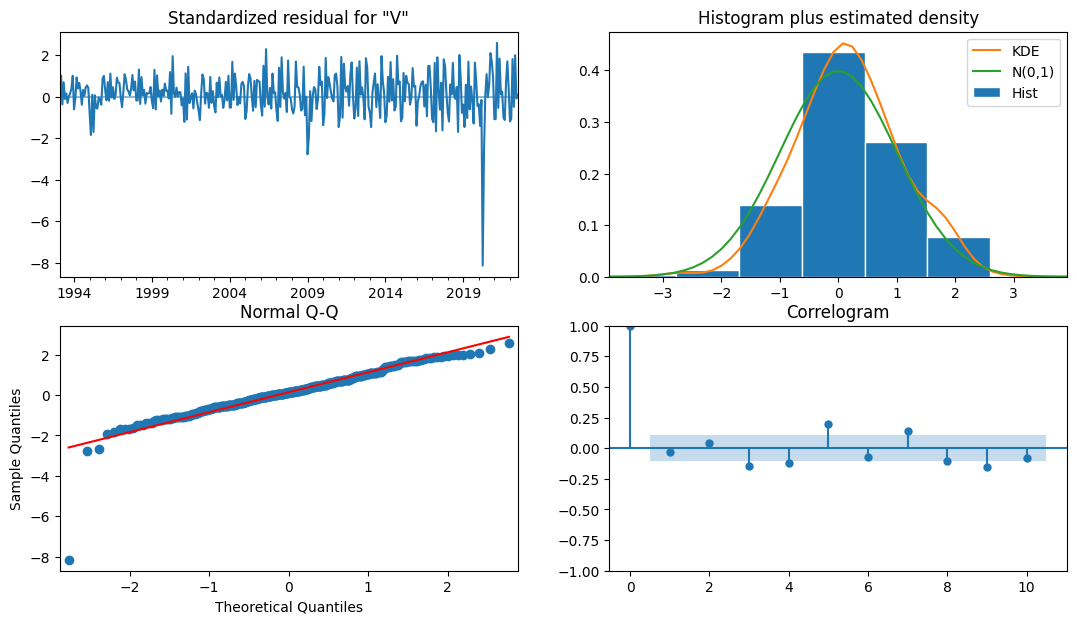

In [ ]:
res.plot_diagnostics(figsize=(13,7))
plt.show()

FORECASTING

In [ ]:
prediction = pd.DataFrame(res.predict(350, 360))
prediction

,predicted_mean
2022-03-01,106.820990
2022-04-01,110.904880
2022-05-01,108.799547
2022-06-01,113.036823
2022-07-01,111.027220
2022-08-01,111.661125
2022-09-01,110.958581
2022-10-01,111.345753
2022-11-01,111.009569
2022-12-01,111.245568


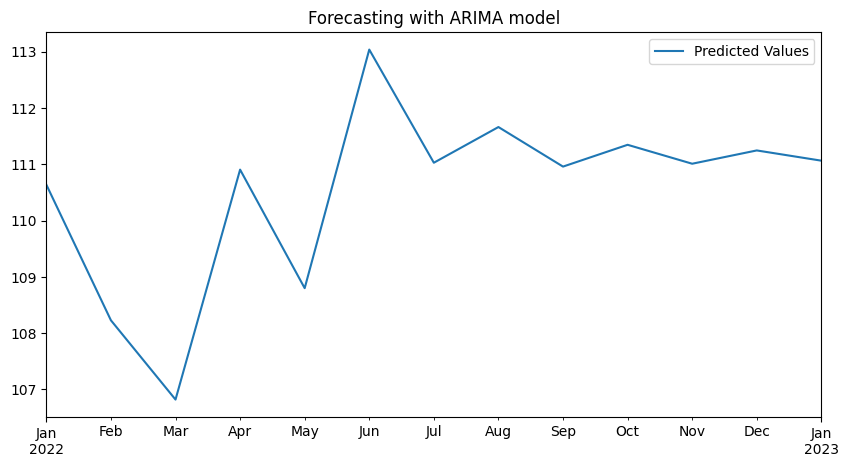

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))   
#frame.plot(ax=ax,label="label")
plt.title("Forecasting with ARIMA model")
res.predict(start=348, end=360, typ="levels").plot(ax=ax,label="Predicted value")
#plt.xticks([350, 352, 354, 356, 358, 360],['2021/11','2022/01','2022/03','2022/05', '2022/07', '2022/09'])
plt.legend(['Predicted Values'])

Prediction using SARIMAX MODEL

In [ ]:
prediction = pd.DataFrame(results.predict(350, 360))
prediction

,predicted_mean
2023-04-01,-1.510984
2023-05-01,-1.170608
2023-06-01,1.681854
2023-07-01,0.942622
2023-08-01,0.258127
2023-09-01,0.088767
2023-10-01,0.109857
2023-11-01,-0.136971
2023-12-01,-0.031334
2024-01-01,0.099602


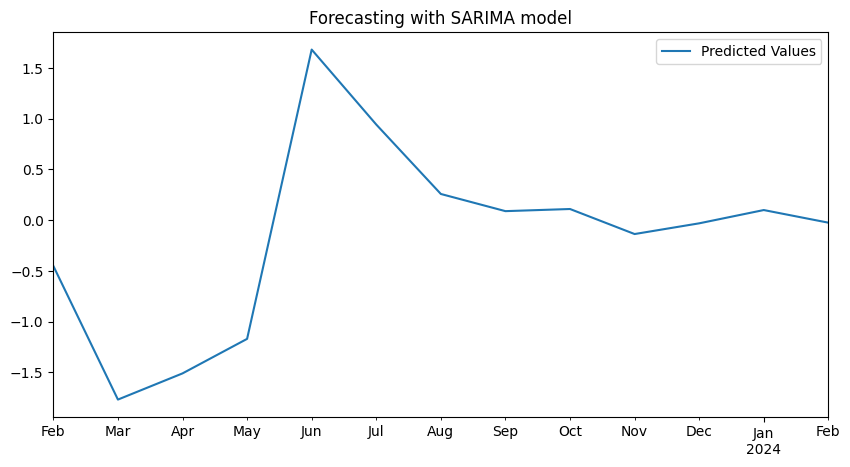

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
results.predict(348, 360).plot(ax=ax,label="Predicted value")
plt.title("Forecasting with SARIMA model")
plt.legend(['Predicted Values'])